# 网络流量分析

In [1]:
%pylab inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## 设定语系

In [2]:
import sys 
reload(sys)
sys.setdefaultencoding('gb2312')

gb_id = u'工号'.encode('gb2312')
gb_name = u'姓名'.encode('gb2312')
gb_datetime = u'日期时间'.encode('gb2312')
gb_type = u'类型'.encode('gb2312')
gb_url = u'网站'.encode('gb2312')
gb_volume = u'流量'.encode('gb2312')
gb_others = u'其他'.encode('gb2312')

## 载入数据

In [3]:
import os

data = pd.concat([pd.read_csv(f, index_col=gb_datetime, parse_dates=True) for f in os.listdir('.') if f.endswith('.csv')])
data.head()

,工号,姓名,类型,网站,流量,Unnamed: 6
日期时间,,,,,,
2017-04-10 08:34:19,315657,吕明宪,营销,::,0.02,NaN
2017-04-10 08:34:20,315657,吕明宪,iCloud,::,0.12,NaN
2017-04-10 08:34:20,315657,吕明宪,Microsoft数据,::,0.00,NaN
2017-04-10 08:34:20,315657,吕明宪,未识别应用,::,0.02,NaN
2017-04-10 08:34:21,315657,吕明宪,ICMP,::,0.00,NaN


## 总流量统计

In [4]:
# 总流量
data[gb_volume].sum()

2236.9000000000001

In [5]:
# 每日流量
daily_total = data.groupby(lambda dt: dt.date)[gb_volume].sum()
daily_total

2017-04-10    589.68
2017-04-11     26.40
2017-04-12    640.09
2017-04-13    256.37
2017-04-14     49.56
2017-04-15     86.39
2017-04-17    135.73
2017-04-18    211.59
2017-04-19      8.54
2017-04-20     25.16
2017-04-21     30.18
2017-04-24    177.21
Name: 流量, dtype: float64

## 每日流量统计

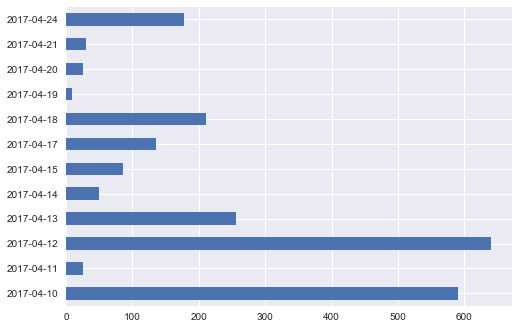

In [6]:
daily_total.plot.barh()

## 总流量分布

In [7]:
# 总流量分布
traffic_dist = data.groupby(gb_type)[gb_volume].sum().sort_values(ascending=False)
traffic_dist.head(10)

类型
百度音乐        1082.08
IT相关         283.16
OneDrive     172.66
未识别应用        144.01
搜索引擎         111.69
PC微信收文件       71.05
新闻门户          45.17
PC微信传文件       36.87
微信            33.51
旅行交通          27.62
Name: 流量, dtype: float64

In [8]:
# 转换类型名称
def type_mapping(t):
    switcher = {
    u'百度音乐'.encode('gb2312'): 'Music',
    u'IT相关'.encode('gb2312'): 'IT related',
    u'OneDrive'.encode('gb2312'): 'OneDrive',
    u'未识别应用'.encode('gb2312'): 'Unknown',
    u'搜索引擎'.encode('gb2312'): 'Search Engine',
    u'PC微信收文件'.encode('gb2312'): 'Wechat file',
    u'新闻门户'.encode('gb2312'): 'News',
    u'PC微信传文件'.encode('gb2312'): 'Wechat file',
    u'微信'.encode('gb2312'): 'Wechat'}
    return switcher.get(t, 'Other')

data[gb_type] = data[gb_type].map(type_mapping)

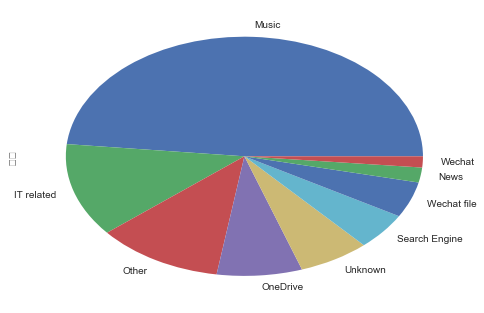

In [9]:
# Top 10 圆饼图
traffic_dist = data.groupby(gb_type)[gb_volume].sum().sort_values(ascending=False)
traffic_dist.head(10).plot.pie()

## 每日流量分布

In [10]:
daily_dist = data.groupby([lambda dt: dt.date, gb_type])[gb_volume].sum().unstack()
daily_dist

类型,IT related,Music,News,OneDrive,Other,Search Engine,Unknown,Wechat,Wechat file
2017-04-10,84.26,366.64,5.23,10.29,23.91,45.60,14.89,5.26,33.60
2017-04-11,1.31,NaN,1.21,10.17,5.95,0.13,1.97,1.80,3.86
2017-04-12,31.96,543.25,4.16,0.51,31.20,12.67,9.18,3.76,3.40
2017-04-13,27.63,172.19,1.22,10.20,22.37,4.77,7.24,4.09,6.66
2017-04-14,12.84,NaN,1.26,0.25,14.71,5.37,11.16,3.86,0.11
2017-04-15,31.91,NaN,1.02,0.22,18.04,10.59,17.30,1.39,5.92
2017-04-17,20.53,NaN,0.90,5.18,32.71,12.90,17.21,2.64,43.66
2017-04-18,18.00,NaN,3.03,135.47,28.14,7.47,13.82,3.21,2.45
2017-04-19,0.39,NaN,0.69,0.05,5.32,0.01,1.12,0.96,NaN
2017-04-20,0.63,NaN,10.29,0.12,9.86,0.02,3.41,0.83,NaN


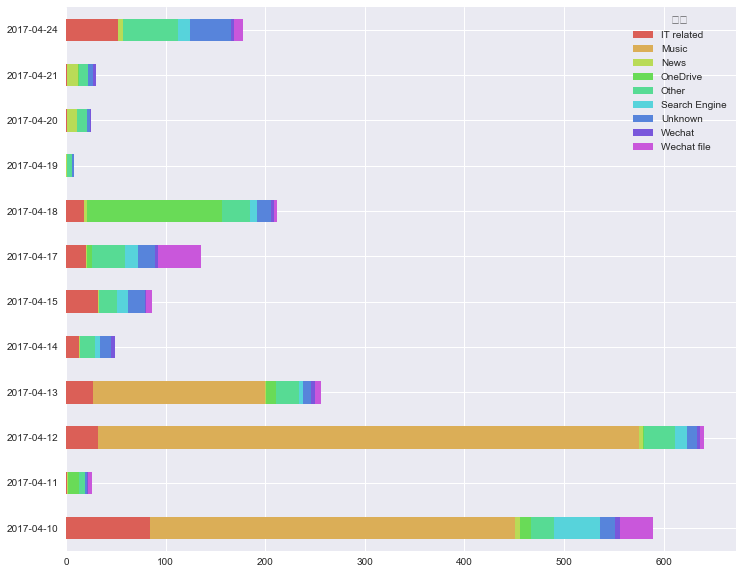

In [11]:
import seaborn as sns
color = sns.color_palette("hls", 10)

ax = daily_dist.plot.barh(stacked=True, figsize=(12,10), color = color)